<h1 align="center"> Decision Tree for Fetal Health Classification </h1> 


Classify the health of a fetus as Normal, Suspect or Pathological using CTG data.
### Context
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

### Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:





1.   Normal (Class Label: 1)
2.   Suspect (Class Label: 2)
3. Pathological (Class Label: 3)



> Acknowledgements

>> Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318 (link)

> License
>> License was not specified at the source, yet access to the data is public and a citation was requested.


## Import the needed libraries

In [45]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import LocalOutlierFactor 
import seaborn as sns 
from sklearn import metrics
from sklearn import tree 
import matplotlib.pyplot as plt 
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import Normalizer 



from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Na GITa/

# Exploring the dataset

### Dataset target
fetal_health

1 - Normal 2 - Suspect 3 - Pathological

### Load the dataset

In [88]:
data = pd.read_csv("data/fetal_health.csv")

data.sample(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1295,115.0,0.001,0.000,0.009,0.001,0.0,0.001,25.0,1.7,0.0,...,71.0,179.0,3.0,2.0,129.0,122.0,130.0,42.0,0.0,1.0
1797,143.0,0.008,0.000,0.003,0.002,0.0,0.000,60.0,2.0,0.0,...,101.0,180.0,9.0,0.0,146.0,144.0,151.0,18.0,0.0,1.0
66,138.0,0.001,0.000,0.004,0.000,0.0,0.000,44.0,1.0,20.0,...,81.0,180.0,9.0,2.0,162.0,156.0,159.0,8.0,1.0,1.0
2052,127.0,0.003,0.003,0.007,0.000,0.0,0.000,65.0,1.2,44.0,...,120.0,146.0,2.0,0.0,126.0,126.0,128.0,1.0,-1.0,1.0
2102,133.0,0.000,0.006,0.007,0.000,0.0,0.000,68.0,3.0,1.0,...,91.0,148.0,8.0,0.0,133.0,129.0,134.0,2.0,1.0,1.0
1919,140.0,0.002,0.001,0.008,0.004,0.0,0.000,63.0,1.4,0.0,...,93.0,163.0,7.0,0.0,142.0,134.0,141.0,22.0,1.0,1.0
2091,133.0,0.000,0.001,0.005,0.000,0.0,0.000,77.0,0.9,34.0,...,130.0,147.0,1.0,0.0,136.0,135.0,137.0,0.0,0.0,1.0
827,152.0,0.000,0.000,0.005,0.002,0.0,0.000,55.0,0.6,45.0,...,99.0,163.0,4.0,3.0,159.0,154.0,158.0,5.0,1.0,1.0
1616,144.0,0.003,0.049,0.002,0.006,0.0,0.001,66.0,3.4,0.0,...,67.0,180.0,7.0,0.0,141.0,110.0,147.0,89.0,1.0,1.0
1661,106.0,0.000,0.000,0.010,0.000,0.0,0.000,63.0,0.6,0.0,...,95.0,123.0,1.0,0.0,112.0,109.0,111.0,2.0,0.0,1.0


### Describe the dataset

In [47]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [48]:
print(f'Dataset shape is {data.shape}')

Dataset shape is (2126, 22)


### Data cleaning

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [60]:
data.isnull().values.any()

False

In [61]:
duplicat = [i for i, v in data.duplicated(keep='first').items() if v == True]
data = data.drop(index=duplicat)

## Data Exploration

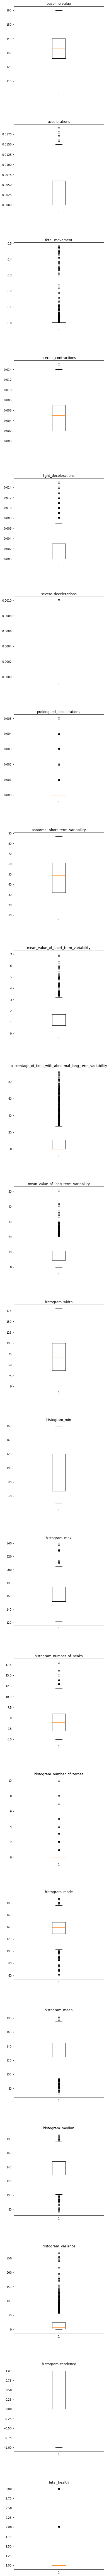

In [62]:
fig, axs = plt.subplots(22)
for i in range(22):
  axs[i].boxplot(data.iloc[:,i])
  axs[i].set_title(data.columns[i])
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.set_figwidth(5)
fig.set_figheight(150)

###Outliners' removal

In [63]:
scaler = Normalizer().fit(data.iloc[:, :-1]) 
X_norm = scaler.transform(data.iloc[:, :-1]) 

clf = LocalOutlierFactor(n_neighbors=20, contamination='auto')

y_pred = clf.fit_predict(X_norm )

mask = y_pred != -1
data = data.iloc[mask, :]



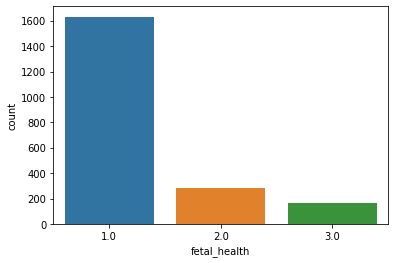

In [64]:
## Is the dataset balanced?

sns.countplot(x='fetal_health',data=data)

###Dealing with unbalanced data


In [65]:
ros = RandomOverSampler(random_state=13)

X_ros, y_ros = ros.fit_resample(data.iloc[:, :-1], data.iloc[:,-1])

data_ros = pd.concat([X_ros, y_ros], axis=1)


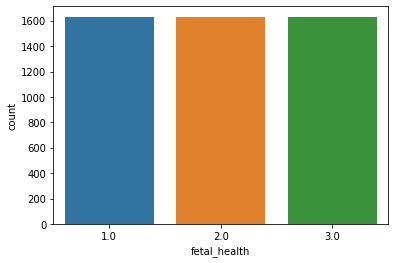

In [66]:
sns.countplot(x='fetal_health', data=data_ros)

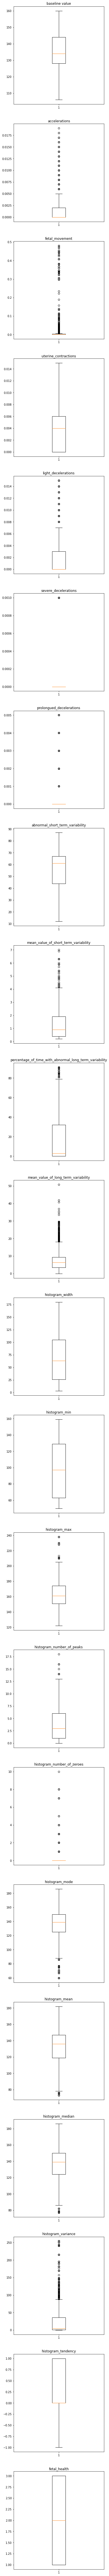

In [67]:
fig, axs = plt.subplots(22)
for i in range(22):
  axs[i].boxplot(data_ros.iloc[:,i])
  axs[i].set_title(data_ros.columns[i])
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.2, wspace=0.3)
fig.set_figwidth(5)
fig.set_figheight(150)

## Split into test and train sets

In [68]:
X_train , X_test , y_train , y_test = train_test_split(X_ros, y_ros, test_size = 0.25 , random_state = 10)

# Decision Tree Adjustment

In [69]:
max_depth = 8
clf = tree.DecisionTreeClassifier( criterion='entropy', max_depth = max_depth, random_state=0, min_impurity_decrease = 0.005)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9362745098039216


## Plot the features importance

1 feature histogram_mean 0.2663577322596097
2 feature mean_value_of_short_term_variability 0.20258482845977147
3 feature abnormal_short_term_variability 0.13551288945593135
4 feature percentage_of_time_with_abnormal_long_term_variability 0.1299959539703234
5 feature accelerations 0.05867068217644456
6 feature prolongued_decelerations 0.05666887728824211
7 feature histogram_median 0.05181003984565168
8 feature histogram_mode 0.02464768085330844
9 feature fetal_movement 0.01779323216583792
10 feature histogram_max 0.015990122069661827
11 feature baseline value 0.012427629966155603
12 feature uterine_contractions 0.008520552250913214
13 feature histogram_min 0.007639257399618139
14 feature histogram_variance 0.007434002582097071
15 feature histogram_tendency 0.003946519256433615
16 feature severe_decelerations 0.0
17 feature light_decelerations 0.0
18 feature histogram_width 0.0
19 feature histogram_number_of_peaks 0.0
20 feature histogram_number_of_zeroes 0.0
21 feature mean_value_of_lon

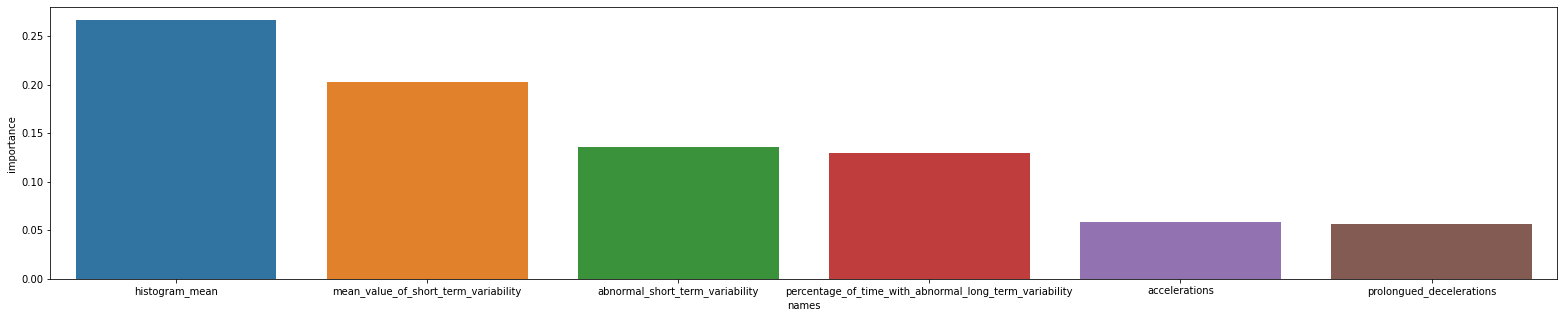

In [70]:
feature_names = list(X_train.columns)
num_features = len(feature_names)
importances = clf.feature_importances_ ## most important line in this cell

df_importance = pd.DataFrame({"names": feature_names, "importance":importances})
df_importance = df_importance.sort_values('importance', ascending=False).reset_index()


indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(f'{f+1} feature {feature_names[indices[f]]} {importances[indices[f]]}')


plt.figure(figsize=(27, 5))
sns.barplot(data=df_importance.iloc[:6,:], x='names', y= 'importance')




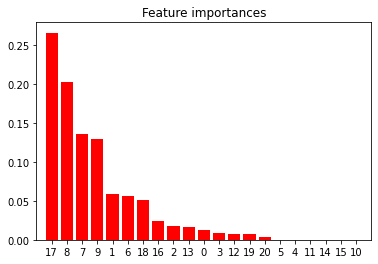

In [71]:
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Hyperparameter tuning

In [72]:
clf = tree.DecisionTreeClassifier( criterion='entropy', max_depth = max_depth, random_state=0,  max_leaf_nodes=20)

print("Start fitting the data")

hp = {"criterion":['gini','entropy'], 'max_depth':np.arange(3,10)}
for cv in tqdm(range(3,6)):
    grid = GridSearchCV(clf, param_grid  = hp  , cv = cv)
    grid.fit(X_train,y_train)
    print(f"score for {cv} fold CV is : {grid.score(X_test,y_test)}")
    print(f"Best result {grid.best_params_}")

Start fitting the data


  0%|          | 0/3 [00:00<?, ?it/s]

score for 3 fold CV is : 0.9199346405228758
Best result {'criterion': 'gini', 'max_depth': 9}
score for 4 fold CV is : 0.9199346405228758
Best result {'criterion': 'gini', 'max_depth': 8}
score for 5 fold CV is : 0.9199346405228758
Best result {'criterion': 'gini', 'max_depth': 8}


## Pruning

In [74]:

clf = tree.DecisionTreeClassifier( criterion='gini', max_depth = 9, random_state=0,  max_leaf_nodes=20)
clf.fit(X_train, y_train)

path = clf.cost_complexity_pruning_path(X_train, y_train) ## Pruning 

ccp_alphas, impurities = path.ccp_alphas, path.impurities 


In [75]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini', max_depth = 9, random_state=0, max_leaf_nodes=20, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15016507653529299


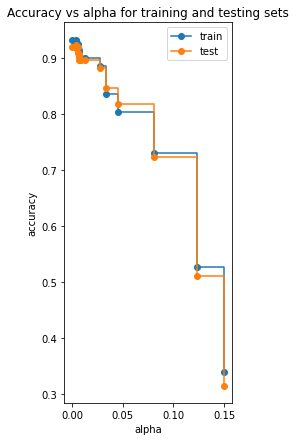

0.0038235169487629735


In [76]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(3,7))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

alpha_best = ccp_alphas[np.amax(np.where(max(np.around(test_scores, 3)) == np.around(test_scores, 3)))]
print(alpha_best)

* As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.Setting ``ccp_alpha=0.0038`` maximizes the testing accuracy with pruned unnecessary leaves.

#Final decision tree

In [77]:
clf = tree.DecisionTreeClassifier( criterion='gini', max_depth = 9, random_state=0,  ccp_alpha = alpha_best, max_leaf_nodes=20) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9240196078431373


### Visualize the tree

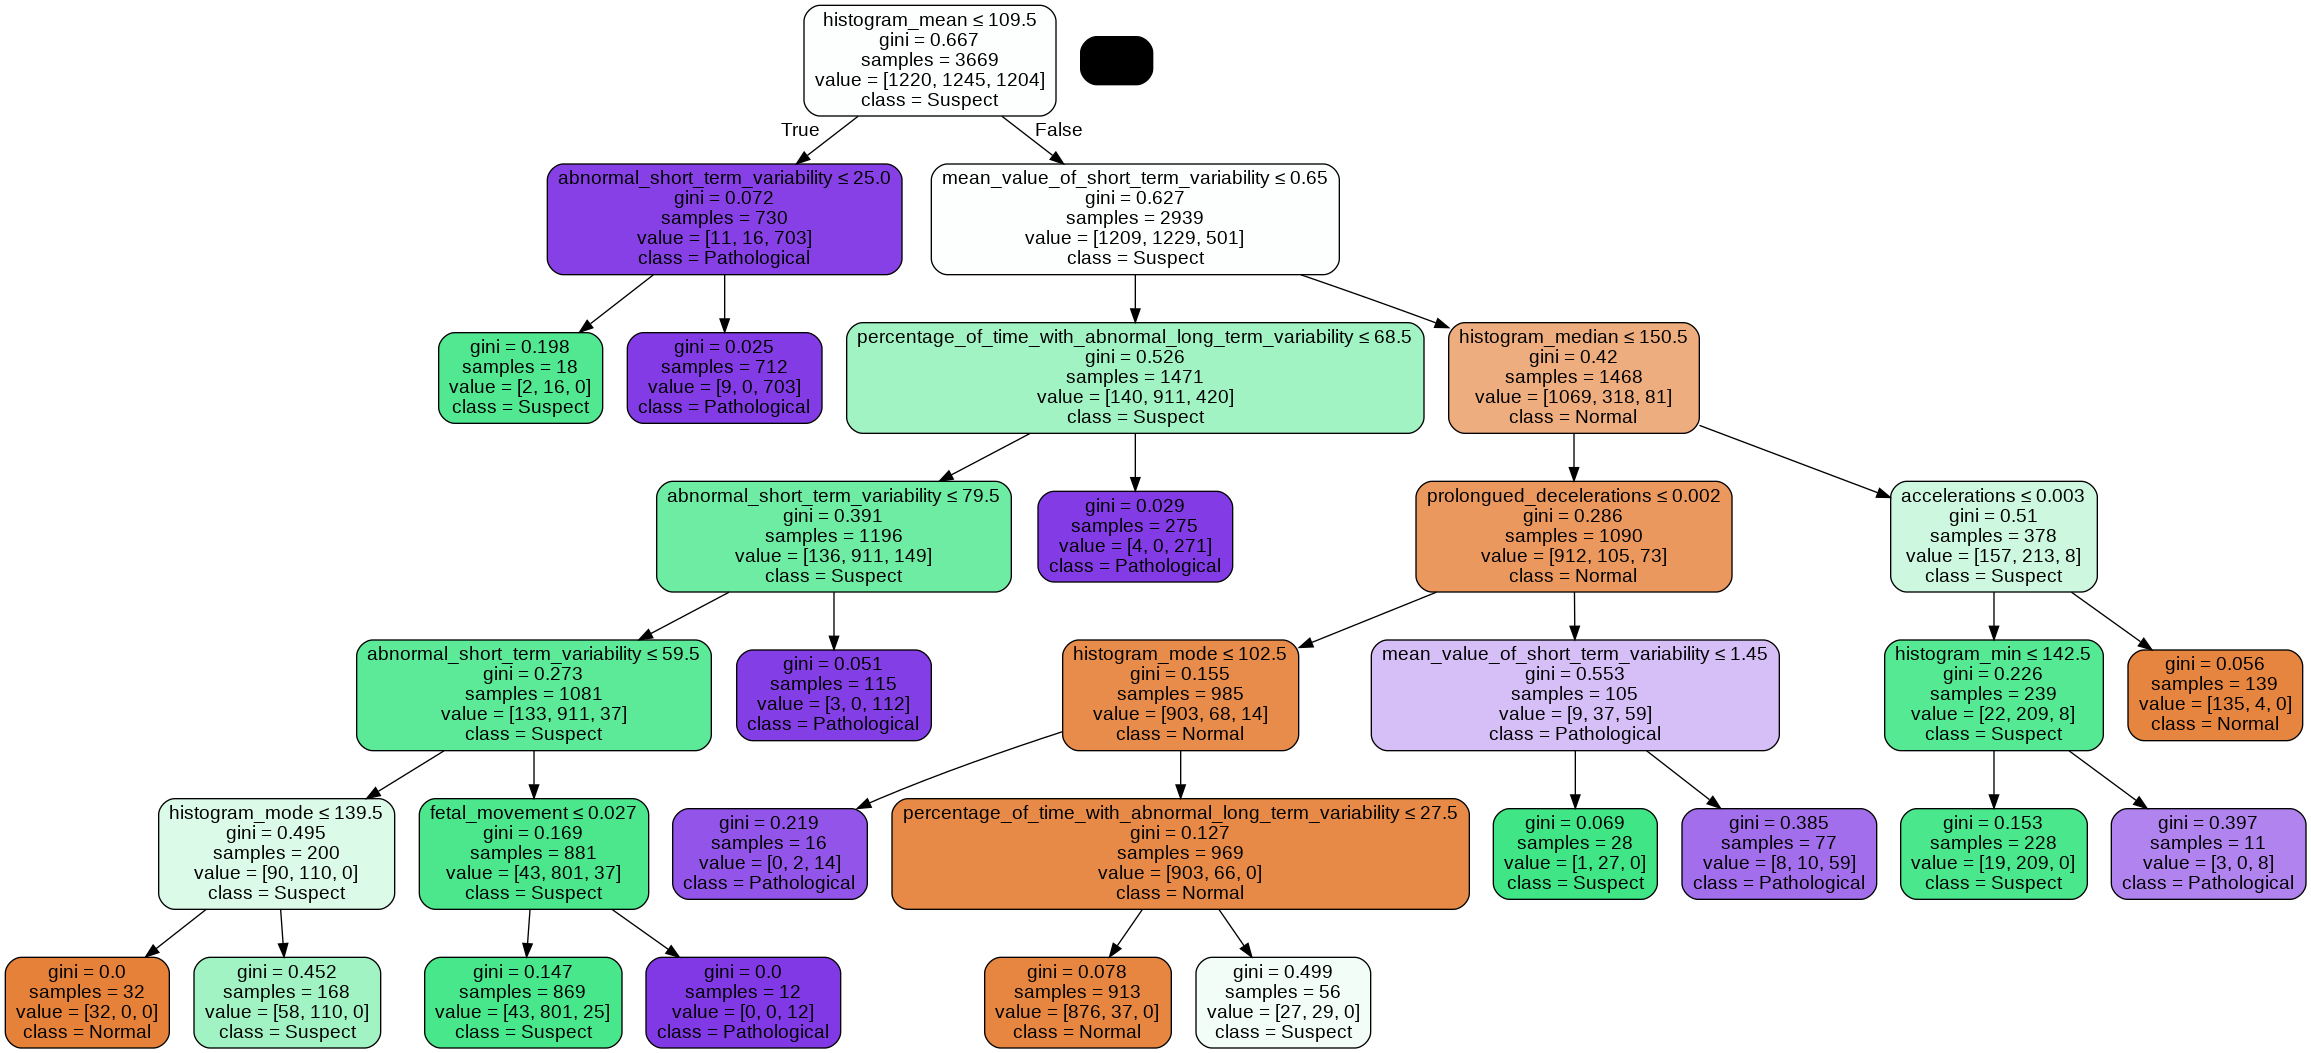

In [78]:
feature_names = list(X_train.columns)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['Normal','Suspect', 'Pathological'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fetal_health_tree.png')
Image(graph.create_png())